# Trip analysis and prediction

From the dataset of kaggle : https://www.kaggle.com/datasets/rkiattisak/traveler-trip-data

Find  tailored marketing strategies and travel packages that meet the needs and preferences of different travelers

For that i will segment the Cohort , find the behavior of each , and  create the bunddle for each . 
If i find the dataset , about the advertising ect ( i hope to)

In [60]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [61]:
df = pd.read_csv("Trip_detail.csv")
df

,Trip ID,Destination,Start date,End date,Duration (days),Traveler name,Traveler age,Traveler gender,Traveler nationality,Accommodation type,Accommodation cost,Transportation type,Transportation cost
0,1,"London, UK",5/1/2023,5/8/2023,7.0,John Smith,35.0,Male,American,Hotel,1200,Flight,600
1,2,"Phuket, Thailand",6/15/2023,6/20/2023,5.0,Jane Doe,28.0,Female,Canadian,Resort,800,Flight,500
2,3,"Bali, Indonesia",7/1/2023,7/8/2023,7.0,David Lee,45.0,Male,Korean,Villa,1000,Flight,700
3,4,"New York, USA",8/15/2023,8/29/2023,14.0,Sarah Johnson,29.0,Female,British,Hotel,2000,Flight,1000
4,5,"Tokyo, Japan",9/10/2023,9/17/2023,7.0,Kim Nguyen,26.0,Female,Vietnamese,Airbnb,700,Train,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,135,"Rio de Janeiro, Brazil",8/1/2023,8/10/2023,9.0,Jose Perez,37.0,Male,Brazilian,Hostel,2500,Car,2000
135,136,"Vancouver, Canada",8/15/2023,8/21/2023,6.0,Emma Wilson,29.0,Female,Canadian,Hotel,5000,Airplane,3000
136,137,"Bangkok, Thailand",9/1/2023,9/8/2023,7.0,Ryan Chen,34.0,Male,Chinese,Hostel,2000,Train,1000
137,138,"Barcelona, Spain",9/15/2023,9/22/2023,7.0,Sofia Rodriguez,25.0,Female,Spanish,Airbnb,6000,Airplane,2500


In [62]:
df.columns

Index(['Trip ID', 'Destination', 'Start date', 'End date', 'Duration (days)',
       'Traveler name', 'Traveler age', 'Traveler gender',
       'Traveler nationality', 'Accommodation type', 'Accommodation cost',
       'Transportation type', 'Transportation cost'],
      dtype='object')

In [63]:
df.isnull().sum()

Trip ID                 0
Destination             2
Start date              2
End date                2
Duration (days)         2
Traveler name           2
Traveler age            2
Traveler gender         2
Traveler nationality    2
Accommodation type      2
Accommodation cost      2
Transportation type     3
Transportation cost     3
dtype: int64

finding the column of null value

In [64]:

null_mask = df.isnull()


has_null = null_mask.any(axis=1)


null_rows = df.loc[has_null]


null_rows

,Trip ID,Destination,Start date,End date,Duration (days),Traveler name,Traveler age,Traveler gender,Traveler nationality,Accommodation type,Accommodation cost,Transportation type,Transportation cost
71,72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
82,83,"Rome, Italy",4/15/2025,4/22/2025,7.0,James Kim,41.0,Male,American,Hotel,100,NaN,NaN
127,128,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We can see the row who got null value are all NaN , or we havent got the  transport cost and accomodation , so il will drop this column

In [65]:
df = df.dropna()


df = df.reset_index(drop=True)


df

,Trip ID,Destination,Start date,End date,Duration (days),Traveler name,Traveler age,Traveler gender,Traveler nationality,Accommodation type,Accommodation cost,Transportation type,Transportation cost
0,1,"London, UK",5/1/2023,5/8/2023,7.0,John Smith,35.0,Male,American,Hotel,1200,Flight,600
1,2,"Phuket, Thailand",6/15/2023,6/20/2023,5.0,Jane Doe,28.0,Female,Canadian,Resort,800,Flight,500
2,3,"Bali, Indonesia",7/1/2023,7/8/2023,7.0,David Lee,45.0,Male,Korean,Villa,1000,Flight,700
3,4,"New York, USA",8/15/2023,8/29/2023,14.0,Sarah Johnson,29.0,Female,British,Hotel,2000,Flight,1000
4,5,"Tokyo, Japan",9/10/2023,9/17/2023,7.0,Kim Nguyen,26.0,Female,Vietnamese,Airbnb,700,Train,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,135,"Rio de Janeiro, Brazil",8/1/2023,8/10/2023,9.0,Jose Perez,37.0,Male,Brazilian,Hostel,2500,Car,2000
132,136,"Vancouver, Canada",8/15/2023,8/21/2023,6.0,Emma Wilson,29.0,Female,Canadian,Hotel,5000,Airplane,3000
133,137,"Bangkok, Thailand",9/1/2023,9/8/2023,7.0,Ryan Chen,34.0,Male,Chinese,Hostel,2000,Train,1000
134,138,"Barcelona, Spain",9/15/2023,9/22/2023,7.0,Sofia Rodriguez,25.0,Female,Spanish,Airbnb,6000,Airplane,2500


In [66]:
df.dtypes

Trip ID                   int64
Destination              object
Start date               object
End date                 object
Duration (days)         float64
Traveler name            object
Traveler age            float64
Traveler gender          object
Traveler nationality     object
Accommodation type       object
Accommodation cost       object
Transportation type      object
Transportation cost      object
dtype: object

Convert column in their good type :

In [67]:
df["Start date"] = pd.to_datetime(df["Start date"])
df["End date"] = pd.to_datetime(df["End date"])
df["Duration (days)"] = df["Duration (days)"].astype(int)
df["Traveler age"] = df["Traveler age"].astype(int)
df["Accommodation cost"] = df["Accommodation cost"].str.replace("$", "").str.replace(",", "").str.replace("USD","").str.strip().astype(float)
df["Transportation cost"] = df["Transportation cost"].str.replace("$", "").str.replace(",", "").str.replace("USD","").str.strip().astype(float)



C:\Users\yskon\AppData\Local\Temp\ipykernel_75100\3053231789.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df["Accommodation cost"] = df["Accommodation cost"].str.replace("$", "").str.replace(",", "").str.replace("USD","").str.strip().astype(float)
C:\Users\yskon\AppData\Local\Temp\ipykernel_75100\3053231789.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df["Transportation cost"] = df["Transportation cost"].str.replace("$", "").str.replace(",", "").str.replace("USD","").str.strip().astype(float)


In [68]:
df.dtypes

Trip ID                          int64
Destination                     object
Start date              datetime64[ns]
End date                datetime64[ns]
Duration (days)                  int32
Traveler name                   object
Traveler age                     int32
Traveler gender                 object
Traveler nationality            object
Accommodation type              object
Accommodation cost             float64
Transportation type             object
Transportation cost            float64
dtype: object

Function to sum-up all the process:

In [69]:
def clean_data(df):
   #clean null value
    df = df.dropna()
    df = df.reset_index(drop=True)
    
    # convert the columns
    df["Start date"] = pd.to_datetime(df["Start date"])
    df["End date"] = pd.to_datetime(df["End date"])
    
    
    df["Duration (days)"] = df["Duration (days)"].astype(int)
    df["Traveler age"] = df["Traveler age"].astype(int)
    
    df["Accommodation cost"] = df["Accommodation cost"].str.replace("$", "").str.replace(",", "").str.replace("USD","").str.strip().astype(float)
    df["Transportation cost"] = df["Transportation cost"].str.replace("$", "").str.replace(",", "").str.replace("USD","").str.strip().astype(float)
    
    
    return df




EDA by Plotting

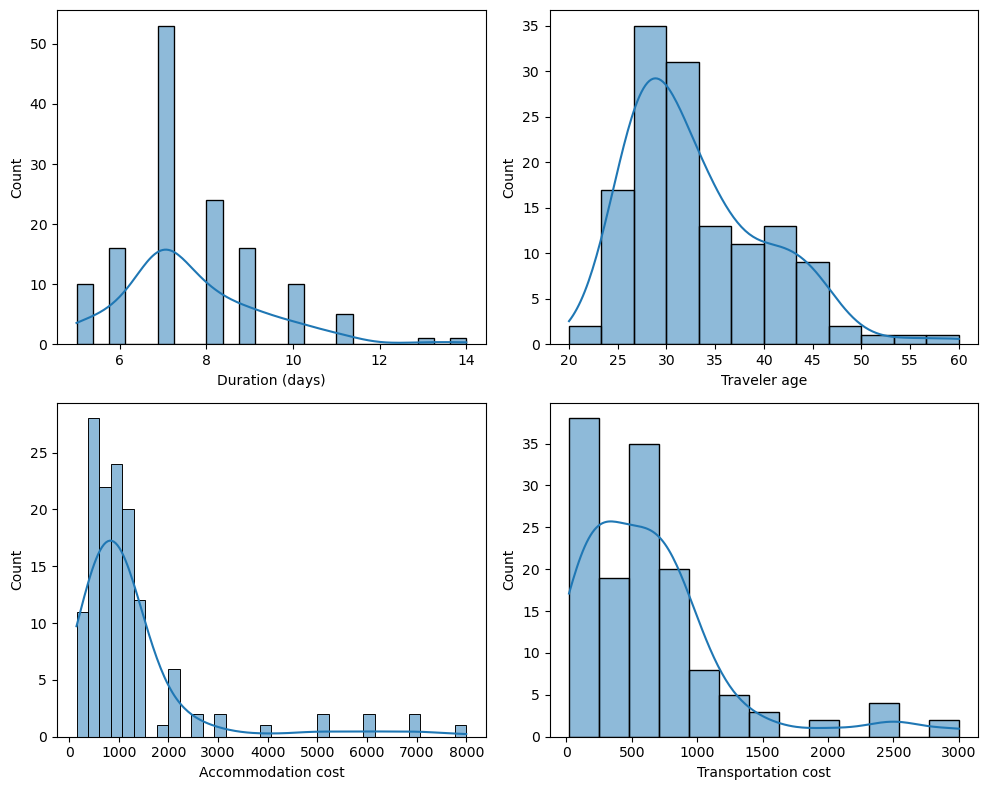

In [70]:


fig, axs = plt.subplots(2, 2, figsize=(10, 8))
sns.histplot(data=df, x="Duration (days)", kde=True, ax=axs[0, 0])
sns.histplot(data=df, x="Traveler age", kde=True, ax=axs[0, 1])
sns.histplot(data=df, x="Accommodation cost", kde=True, ax=axs[1, 0])
sns.histplot(data=df, x="Transportation cost", kde=True, ax=axs[1, 1])
plt.tight_layout()
plt.show()

In [71]:
df.describe()

,Trip ID,Duration (days),Traveler age,Accommodation cost,Transportation cost
count,136.000000,136.000000,136.000000,136.000000,136.000000
mean,69.463235,7.610294,33.117647,1253.529412,645.183824
std,40.388284,1.606343,7.139933,1338.644162,584.476153
min,1.000000,5.000000,20.000000,150.000000,20.000000
25%,34.750000,7.000000,28.000000,600.000000,200.000000
50%,68.500000,7.000000,31.000000,900.000000,550.000000
75%,104.250000,8.000000,37.250000,1200.000000,800.000000
max,139.000000,14.000000,60.000000,8000.000000,3000.000000


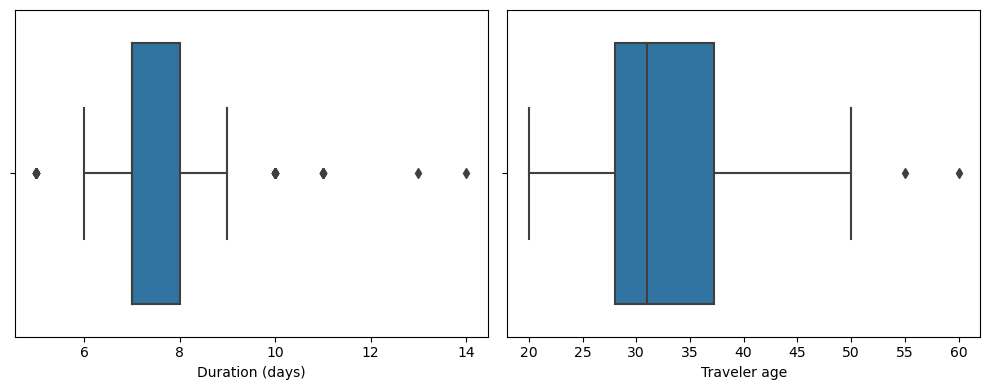

In [72]:
#Check the outliers
fig, axs = plt.subplots(1, 2, figsize=(10, 4))
sns.boxplot(data=df, x="Duration (days)", ax=axs[0])
sns.boxplot(data=df, x="Traveler age", ax=axs[1])
plt.tight_layout()
plt.show()

Lets make beans of each : ( we will not have the perfect value but a range as result of our prediciton , however we will get more valuable data to train our model)

In [73]:
def MakeBinsNumeric(df):
    bins_duration = [0, 7, 14]
    labels_duration= ['0-7', '8-14']
    df['Duration (days)'] = pd.cut(df['Duration (days)'], bins=bins_duration, labels=labels_duration)
    
    bins_age = [0, 25, 35, 45,60]
    labels_age = ['0-25', '26-35', '36-45', '46-60']
    df['Traveler age'] = pd.cut(df['Traveler age'], bins=bins_age, labels=labels_age)
    
    bins_accom = [0, 600, 900,  8000]
    labels_accom = ['Low_Cost', 'Medium_Cost', 'High_Cost']
    df['Accommodation cost'] = pd.cut(df['Accommodation cost'], bins=bins_accom, labels=labels_accom)

    bins_transp = [0,  550, 800,3000 ]
    labels_transp = ['Low_Cost', 'Medium_Cost', 'High_Cost']
    df['Transportation cost'] = pd.cut(df['Transportation cost'], bins=bins_transp, labels=labels_transp)


    
    return df

MakeBinsNumeric(df)
df


,Trip ID,Destination,Start date,End date,Duration (days),Traveler name,Traveler age,Traveler gender,Traveler nationality,Accommodation type,Accommodation cost,Transportation type,Transportation cost
0,1,"London, UK",2023-05-01,2023-05-08,0-7,John Smith,26-35,Male,American,Hotel,High_Cost,Flight,Medium_Cost
1,2,"Phuket, Thailand",2023-06-15,2023-06-20,0-7,Jane Doe,26-35,Female,Canadian,Resort,Medium_Cost,Flight,Low_Cost
2,3,"Bali, Indonesia",2023-07-01,2023-07-08,0-7,David Lee,36-45,Male,Korean,Villa,High_Cost,Flight,Medium_Cost
3,4,"New York, USA",2023-08-15,2023-08-29,8-14,Sarah Johnson,26-35,Female,British,Hotel,High_Cost,Flight,High_Cost
4,5,"Tokyo, Japan",2023-09-10,2023-09-17,0-7,Kim Nguyen,26-35,Female,Vietnamese,Airbnb,Medium_Cost,Train,Low_Cost
...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,135,"Rio de Janeiro, Brazil",2023-08-01,2023-08-10,8-14,Jose Perez,36-45,Male,Brazilian,Hostel,High_Cost,Car,High_Cost
132,136,"Vancouver, Canada",2023-08-15,2023-08-21,0-7,Emma Wilson,26-35,Female,Canadian,Hotel,High_Cost,Airplane,High_Cost
133,137,"Bangkok, Thailand",2023-09-01,2023-09-08,0-7,Ryan Chen,26-35,Male,Chinese,Hostel,High_Cost,Train,High_Cost
134,138,"Barcelona, Spain",2023-09-15,2023-09-22,0-7,Sofia Rodriguez,0-25,Female,Spanish,Airbnb,High_Cost,Airplane,High_Cost


In [74]:
 # Display of each value 
print("Unique values for each column:")
for col in df.columns:
    print(f"{col}: {df[col].unique()}")


print("\nSum for each column with numeric values:")
for col in df.select_dtypes(include=['int', 'float']).columns:
    print(f"{col}: {df[col].sum()}")

Unique values for each column:
Trip ID: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  73
  74  75  76  77  78  79  80  81  82  84  85  86  87  88  89  90  91  92
  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110
 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 129
 130 131 132 133 134 135 136 137 138 139]
Destination: ['London, UK' 'Phuket, Thailand' 'Bali, Indonesia' 'New York, USA'
 'Tokyo, Japan' 'Paris, France' 'Sydney, Australia'
 'Rio de Janeiro, Brazil' 'Amsterdam, Netherlands'
 'Dubai, United Arab Emirates' 'Cancun, Mexico' 'Barcelona, Spain'
 'Honolulu, Hawaii' 'Berlin, Germany' 'Marrakech, Morocco'
 'Edinburgh, Scotland' 'Paris' 'Bali' 'London' 'Tokyo' 'New York' 'Sydney'
 'Rome' 'Bangkok' 'Hawa

Check the correlation :

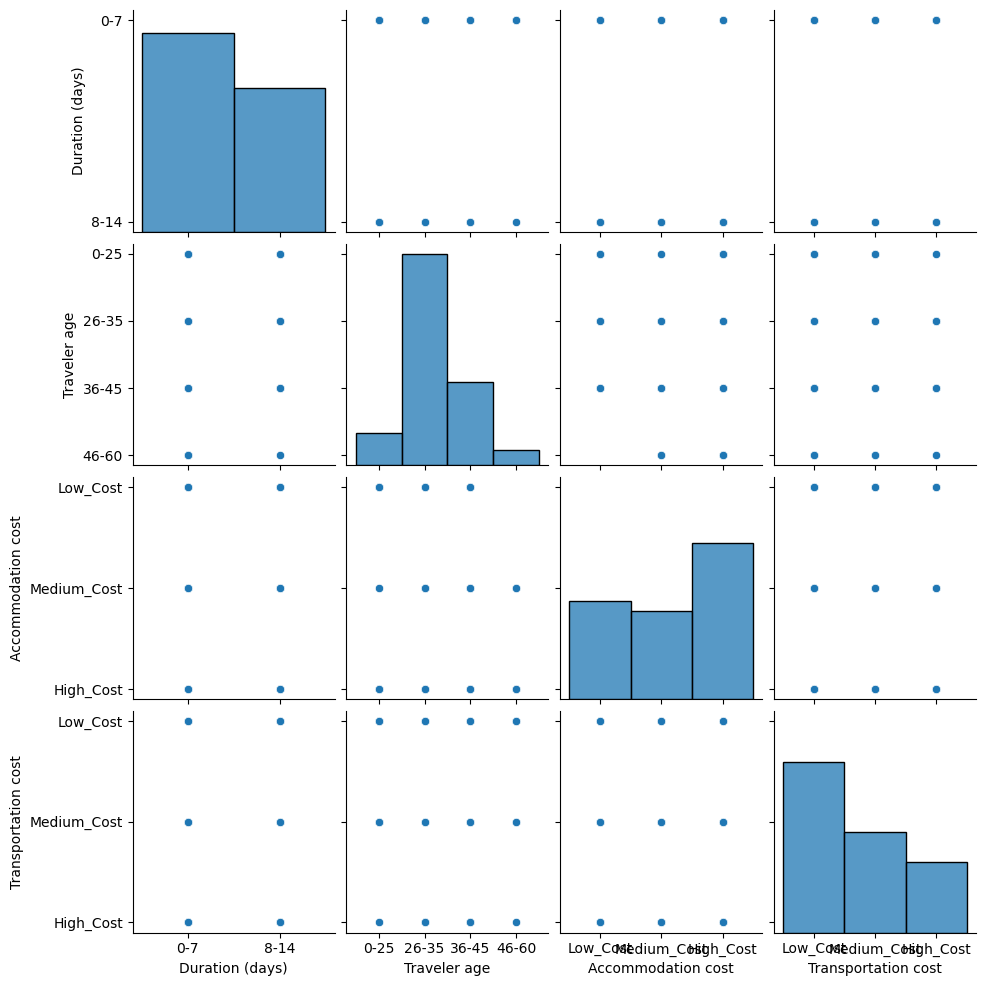

In [75]:

sns.pairplot(df, vars=["Duration (days)", "Traveler age", "Accommodation cost", "Transportation cost"])
plt.show()

check the categorical feature 

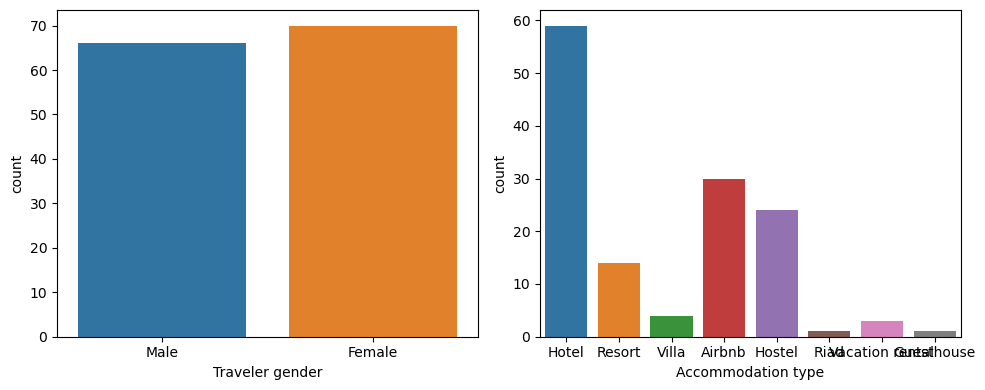

In [76]:

fig, axs = plt.subplots(1, 2, figsize=(10, 4))
sns.countplot(data=df, x="Traveler gender", ax=axs[0])
sns.countplot(data=df, x="Accommodation type", ax=axs[1])
plt.tight_layout()
plt.show()

In [77]:
df["Accommodation type"].unique()

array(['Hotel', 'Resort', 'Villa', 'Airbnb', 'Hostel', 'Riad',
       'Vacation rental', 'Guesthouse'], dtype=object)

We can see  Accomodation type can be organize in 2 types : 

In [78]:
classique = ['Hotel', 'Resort', 'Villa', 'Hostel']
alternatif = ['Airbnb', 'Riad', 'Vacation rental', 'Guesthouse']

df['Accommodation type'] = df['Accommodation type'].apply(lambda x: 'Classique' if x in classique else 'Alternatif')
df

,Trip ID,Destination,Start date,End date,Duration (days),Traveler name,Traveler age,Traveler gender,Traveler nationality,Accommodation type,Accommodation cost,Transportation type,Transportation cost
0,1,"London, UK",2023-05-01,2023-05-08,0-7,John Smith,26-35,Male,American,Classique,High_Cost,Flight,Medium_Cost
1,2,"Phuket, Thailand",2023-06-15,2023-06-20,0-7,Jane Doe,26-35,Female,Canadian,Classique,Medium_Cost,Flight,Low_Cost
2,3,"Bali, Indonesia",2023-07-01,2023-07-08,0-7,David Lee,36-45,Male,Korean,Classique,High_Cost,Flight,Medium_Cost
3,4,"New York, USA",2023-08-15,2023-08-29,8-14,Sarah Johnson,26-35,Female,British,Classique,High_Cost,Flight,High_Cost
4,5,"Tokyo, Japan",2023-09-10,2023-09-17,0-7,Kim Nguyen,26-35,Female,Vietnamese,Alternatif,Medium_Cost,Train,Low_Cost
...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,135,"Rio de Janeiro, Brazil",2023-08-01,2023-08-10,8-14,Jose Perez,36-45,Male,Brazilian,Classique,High_Cost,Car,High_Cost
132,136,"Vancouver, Canada",2023-08-15,2023-08-21,0-7,Emma Wilson,26-35,Female,Canadian,Classique,High_Cost,Airplane,High_Cost
133,137,"Bangkok, Thailand",2023-09-01,2023-09-08,0-7,Ryan Chen,26-35,Male,Chinese,Classique,High_Cost,Train,High_Cost
134,138,"Barcelona, Spain",2023-09-15,2023-09-22,0-7,Sofia Rodriguez,0-25,Female,Spanish,Alternatif,High_Cost,Airplane,High_Cost


Relation between feature:

C:\Users\yskon\AppData\Local\Temp\ipykernel_75100\3627720232.py:4: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


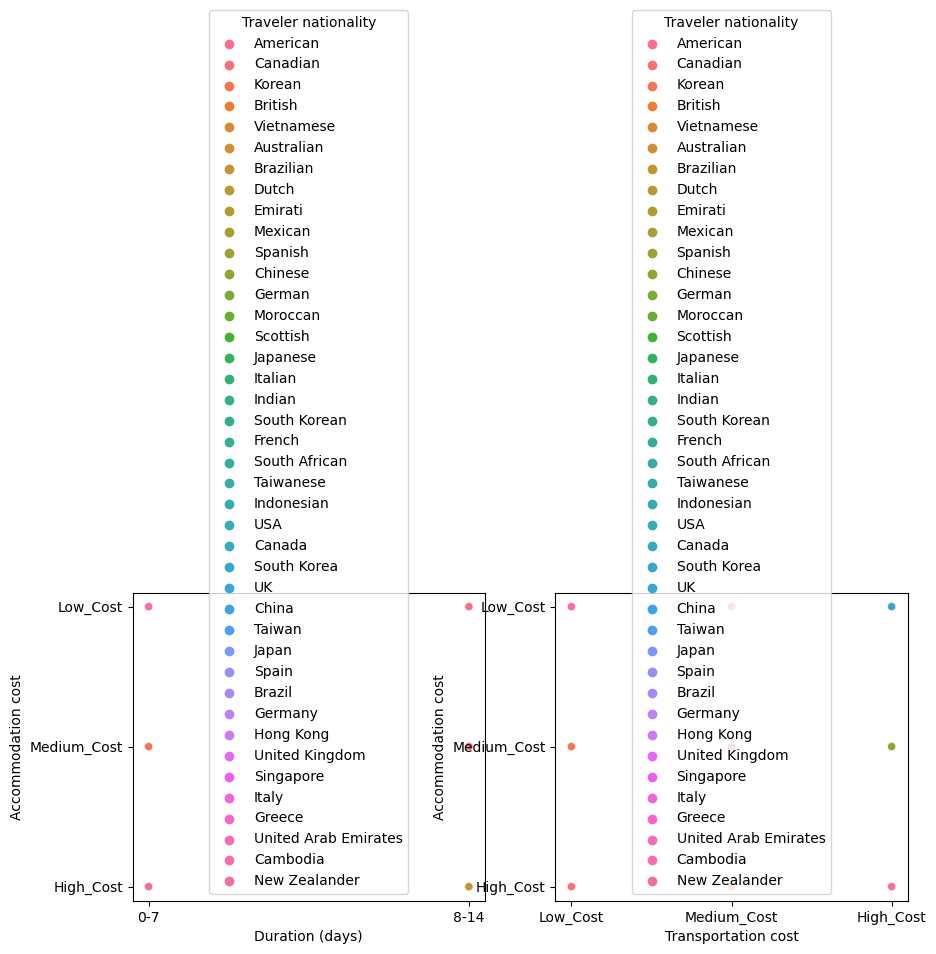

In [79]:

fig, axs = plt.subplots(1, 2, figsize=(10, 4))
sns.scatterplot(data=df, x="Duration (days)", y="Accommodation cost", hue="Traveler nationality", ax=axs[0])
sns.scatterplot(data=df, x="Transportation cost", y="Accommodation cost", hue="Traveler nationality", ax=axs[1])
plt.tight_layout()
plt.show()

In [80]:
df['Traveler nationality'].unique()

array(['American', 'Canadian', 'Korean', 'British', 'Vietnamese',
       'Australian', 'Brazilian', 'Dutch', 'Emirati', 'Mexican',
       'Spanish', 'Chinese', 'German', 'Moroccan', 'Scottish', 'Japanese',
       'Italian', 'Indian', 'South Korean', 'French', 'South African',
       'Taiwanese', 'Indonesian', 'USA', 'Canada', 'South Korea', 'UK',
       'China', 'Taiwan', 'Japan', 'Spain', 'Brazil', 'Germany',
       'Hong Kong', 'United Kingdom', 'Singapore', 'Italy', 'Greece',
       'United Arab Emirates', 'Cambodia', 'New Zealander'], dtype=object)

lets organize that by region

In [81]:
def NationalityTraveler(df):
    America = ['American', 'Canadian', 'Mexican','Brazilian']
    Europe = ['British', 'Dutch', 'German', 'Scottish', 'Italian', 'French', 'Spanish', 'Greek']
    Asia = ['Korean', 'Vietnamese', 'Chinese', 'Japanese', 'Indian', 'South Korean', 'Taiwanese', 'Indonesian', 'Chinese', 'Taiwan', 'Japan', 'Hong Kong', 'Singapore', 'Cambodia']
    Africa = ['Moroccan', 'South African','Emirati', 'United Arab Emirates']
    Oceania = ['Australian', 'New Zealander']

# create a dictionary to map each nationality to its corresponding continent
    continent_dict = {}
    for nationality in America:
        continent_dict[nationality] = 'America'
    for nationality in Europe:  
        continent_dict[nationality] = 'Europe'
    for nationality in Asia:
        continent_dict[nationality] = 'Asia'
    for nationality in Africa:
        continent_dict[nationality] = 'Africa'
    for nationality in Oceania:
        continent_dict[nationality] = 'Oceania'


    df['Traveler nationality'] = df['Traveler nationality'].map(continent_dict)
    return df
df

,Trip ID,Destination,Start date,End date,Duration (days),Traveler name,Traveler age,Traveler gender,Traveler nationality,Accommodation type,Accommodation cost,Transportation type,Transportation cost
0,1,"London, UK",2023-05-01,2023-05-08,0-7,John Smith,26-35,Male,American,Classique,High_Cost,Flight,Medium_Cost
1,2,"Phuket, Thailand",2023-06-15,2023-06-20,0-7,Jane Doe,26-35,Female,Canadian,Classique,Medium_Cost,Flight,Low_Cost
2,3,"Bali, Indonesia",2023-07-01,2023-07-08,0-7,David Lee,36-45,Male,Korean,Classique,High_Cost,Flight,Medium_Cost
3,4,"New York, USA",2023-08-15,2023-08-29,8-14,Sarah Johnson,26-35,Female,British,Classique,High_Cost,Flight,High_Cost
4,5,"Tokyo, Japan",2023-09-10,2023-09-17,0-7,Kim Nguyen,26-35,Female,Vietnamese,Alternatif,Medium_Cost,Train,Low_Cost
...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,135,"Rio de Janeiro, Brazil",2023-08-01,2023-08-10,8-14,Jose Perez,36-45,Male,Brazilian,Classique,High_Cost,Car,High_Cost
132,136,"Vancouver, Canada",2023-08-15,2023-08-21,0-7,Emma Wilson,26-35,Female,Canadian,Classique,High_Cost,Airplane,High_Cost
133,137,"Bangkok, Thailand",2023-09-01,2023-09-08,0-7,Ryan Chen,26-35,Male,Chinese,Classique,High_Cost,Train,High_Cost
134,138,"Barcelona, Spain",2023-09-15,2023-09-22,0-7,Sofia Rodriguez,0-25,Female,Spanish,Alternatif,High_Cost,Airplane,High_Cost


Same process of Destination

In [82]:
df["Destination"].unique()

array(['London, UK', 'Phuket, Thailand', 'Bali, Indonesia',
       'New York, USA', 'Tokyo, Japan', 'Paris, France',
       'Sydney, Australia', 'Rio de Janeiro, Brazil',
       'Amsterdam, Netherlands', 'Dubai, United Arab Emirates',
       'Cancun, Mexico', 'Barcelona, Spain', 'Honolulu, Hawaii',
       'Berlin, Germany', 'Marrakech, Morocco', 'Edinburgh, Scotland',
       'Paris', 'Bali', 'London', 'Tokyo', 'New York', 'Sydney', 'Rome',
       'Bangkok', 'Hawaii', 'Barcelona', 'Japan', 'Thailand', 'France',
       'Australia', 'Brazil', 'Greece', 'Egypt', 'Mexico', 'Italy',
       'Spain', 'Canada', 'New York City, USA', 'Bangkok, Thailand',
       'Vancouver, Canada', 'Sydney, AUS', 'Seoul, South Korea',
       'Los Angeles, USA', 'Rome, Italy', 'Cape Town', 'Cape Town, SA',
       'Sydney, Aus', 'Bangkok, Thai', 'Phuket, Thai', 'Dubai', 'Seoul',
       'Rio de Janeiro', 'Amsterdam', 'Phuket', 'Santorini', 'Phnom Penh',
       'Athens, Greece', 'Cape Town, South Africa',
       'Au

In [83]:
def DestinationClear(df):
    df['Destination'] = df['Destination'].str.split(', ').str[1]
    df['Destination'] = df['Destination'].fillna(df['Destination'].str.split(', ').str[0])
    df['Destination'] = df['Destination'].str.replace('AUS', 'Aus').str.replace('USouth Africa', 'South Africa').str.replace('SA', 'South Africa')
    df['Destination'] = np.where(df['Destination'].isna() | (df['Destination'] == 'nan'), df['Destination'].str.split(', ').str[0], df['Destination'])
    return df

DestinationClear(df)
df



,Trip ID,Destination,Start date,End date,Duration (days),Traveler name,Traveler age,Traveler gender,Traveler nationality,Accommodation type,Accommodation cost,Transportation type,Transportation cost
0,1,UK,2023-05-01,2023-05-08,0-7,John Smith,26-35,Male,American,Classique,High_Cost,Flight,Medium_Cost
1,2,Thailand,2023-06-15,2023-06-20,0-7,Jane Doe,26-35,Female,Canadian,Classique,Medium_Cost,Flight,Low_Cost
2,3,Indonesia,2023-07-01,2023-07-08,0-7,David Lee,36-45,Male,Korean,Classique,High_Cost,Flight,Medium_Cost
3,4,USouth Africa,2023-08-15,2023-08-29,8-14,Sarah Johnson,26-35,Female,British,Classique,High_Cost,Flight,High_Cost
4,5,Japan,2023-09-10,2023-09-17,0-7,Kim Nguyen,26-35,Female,Vietnamese,Alternatif,Medium_Cost,Train,Low_Cost
...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,135,Brazil,2023-08-01,2023-08-10,8-14,Jose Perez,36-45,Male,Brazilian,Classique,High_Cost,Car,High_Cost
132,136,Canada,2023-08-15,2023-08-21,0-7,Emma Wilson,26-35,Female,Canadian,Classique,High_Cost,Airplane,High_Cost
133,137,Thailand,2023-09-01,2023-09-08,0-7,Ryan Chen,26-35,Male,Chinese,Classique,High_Cost,Train,High_Cost
134,138,Spain,2023-09-15,2023-09-22,0-7,Sofia Rodriguez,0-25,Female,Spanish,Alternatif,High_Cost,Airplane,High_Cost


In [84]:
df["Destination"].unique()

array(['UK', 'Thailand', 'Indonesia', 'USouth Africa', 'Japan', 'France',
       'Australia', 'Brazil', 'Netherlands', 'United Arab Emirates',
       'Mexico', 'Spain', 'Hawaii', 'Germany', 'Morocco', 'Scotland', nan,
       'Canada', 'Aus', 'South Korea', 'Italy', 'South Africa', 'Thai',
       'Greece', 'New Zealand'], dtype=object)

### Clean transport type

In [85]:
df["Transportation type"].unique()

array(['Flight', 'Train', 'Plane', 'Bus', 'Car rental', 'Subway', 'Car',
       'Ferry', 'Airplane'], dtype=object)

In [86]:
def clean_transportation_types(df):
    df['Transportation type'] = df['Transportation type'].replace(['Flight', 'Plane', 'Airplane'], 'Flight')
    df['Transportation type'] = df['Transportation type'].replace(['Train','Subway''Bus''Ferry'], 'Collectif Travel')
    df['Transportation type'] = df['Transportation type'].replace(['Car rental', 'Car'], 'Car')
    
    return df


## Create dummies variable , better performance for the machine learning model

In [87]:
df = pd.get_dummies(df, columns=['Destination', 'Duration (days)', 'Traveler age', 'Traveler nationality', 'Accommodation cost', 'Transportation cost', 'Transportation type'])
df

,Trip ID,Start date,End date,Traveler name,Traveler gender,Accommodation type,Destination_Aus,Destination_Australia,Destination_Brazil,Destination_Canada,...,Transportation cost_High_Cost,Transportation type_Airplane,Transportation type_Bus,Transportation type_Car,Transportation type_Car rental,Transportation type_Ferry,Transportation type_Flight,Transportation type_Plane,Transportation type_Subway,Transportation type_Train
0,1,2023-05-01,2023-05-08,John Smith,Male,Classique,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,2,2023-06-15,2023-06-20,Jane Doe,Female,Classique,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,3,2023-07-01,2023-07-08,David Lee,Male,Classique,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,4,2023-08-15,2023-08-29,Sarah Johnson,Female,Classique,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
4,5,2023-09-10,2023-09-17,Kim Nguyen,Female,Alternatif,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,135,2023-08-01,2023-08-10,Jose Perez,Male,Classique,0,0,1,0,...,1,0,0,1,0,0,0,0,0,0
132,136,2023-08-15,2023-08-21,Emma Wilson,Female,Classique,0,0,0,1,...,1,1,0,0,0,0,0,0,0,0
133,137,2023-09-01,2023-09-08,Ryan Chen,Male,Classique,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
134,138,2023-09-15,2023-09-22,Sofia Rodriguez,Female,Alternatif,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0


not sure about that